In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Image_size=256
Batch_size=32
Channels=3
Epoch=50
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/WheatDataSet",
                                                            shuffle=True,
                                                            image_size=(Image_size,Image_size),
                                                            batch_size=Batch_size
                                                            )

class_names=dataset.class_names

Found 2942 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
print(class_names)

['Brown_rust', 'Healthy', 'Yellow_rust']


In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.7,val_split=0.2,test_split=0.1,shuffle=True,shuffle_size=1000):

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)#here random data of 1000 are shuffle by 2^12 different ways
    #these lines perform same things like above ones
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)#here we skip and take data in one line for validation data set
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_rescale=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_agumantation=tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(Batch_size,Image_size,Image_size,Channels)
n_classes=3
model=models.Sequential([
resize_rescale,
data_agumantation,
layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation="relu"),
layers.Dense(n_classes,activation="softmax"),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer="adam",
   loss= tf.keras.losses.SparseCategoricalCrossentropy( from_logits=False
    ),
    metrics=["accuracy"]
)

In [ ]:
model_version=1
history=model.fit(train_ds,epochs=Epoch,batch_size=Batch_size,verbose=1,validation_data=val_ds)

model.evaluate(test_ds)

Epoch 1/50
64/64 [==============================] - 748s 330ms/step - loss: 0.7507 - accuracy: 0.6158 - val_loss: 0.5229 - val_accuracy: 0.7378
Epoch 2/50
64/64 [==============================] - 5s 71ms/step - loss: 0.5407 - accuracy: 0.7292 - val_loss: 0.4901 - val_accuracy: 0.8073
Epoch 3/50
64/64 [==============================] - 4s 67ms/step - loss: 0.3725 - accuracy: 0.8426 - val_loss: 0.4769 - val_accuracy: 0.8247
Epoch 4/50
64/64 [==============================] - 4s 67ms/step - loss: 0.3015 - accuracy: 0.8817 - val_loss: 0.2928 - val_accuracy: 0.8872
Epoch 5/50
64/64 [==============================] - 5s 72ms/step - loss: 0.2409 - accuracy: 0.9184 - val_loss: 0.1817 - val_accuracy: 0.9340
Epoch 6/50
64/64 [==============================] - 4s 68ms/step - loss: 0.1657 - accuracy: 0.9423 - val_loss: 0.3638 - val_accuracy: 0.8715
Epoch 7/50
64/64 [==============================] - 4s 68ms/step - loss: 0.2185 - accuracy: 0.9252 - val_loss: 0.1567 - val_accuracy: 0.9566
Epoch 8/50

[0.1042589545249939, 0.9593750238418579]

In [ ]:
history

history.params

history.history.keys()

len(history.history["accuracy"])

acc=history.history["accuracy"]
loss=history.history["loss"]
val_accuracy=history.history["val_accuracy"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

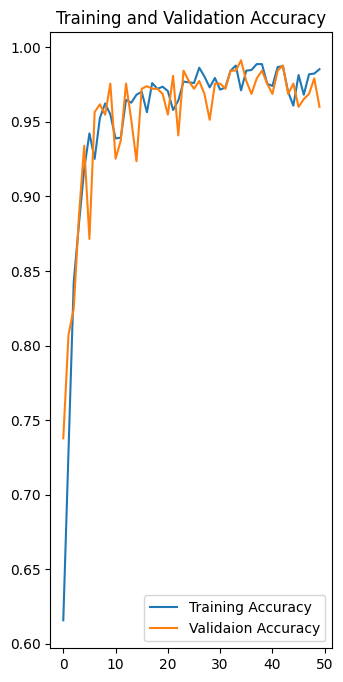

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epoch),acc,label="Training Accuracy")
plt.plot(range(Epoch),val_accuracy,label="Validaion Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

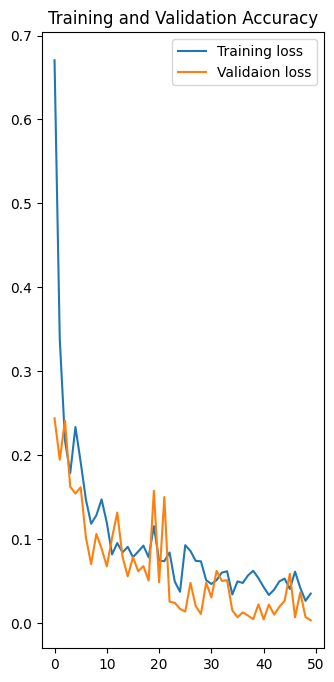

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epoch),loss,label="Training loss")
plt.plot(range(Epoch),val_loss,label="Validaion loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")



First image to predict
Actual_label: Healthy
1/1 [==============================] - 0s 168ms/step
Prediction lable: Healthy
First image to predict
Actual_label: Brown_rust
1/1 [==============================] - 0s 42ms/step
Prediction lable: Brown_rust
First image to predict
Actual_label: Yellow_rust
1/1 [==============================] - 0s 41ms/step
Prediction lable: Yellow_rust
First image to predict
Actual_label: Healthy
1/1 [==============================] - 0s 33ms/step
Prediction lable: Healthy


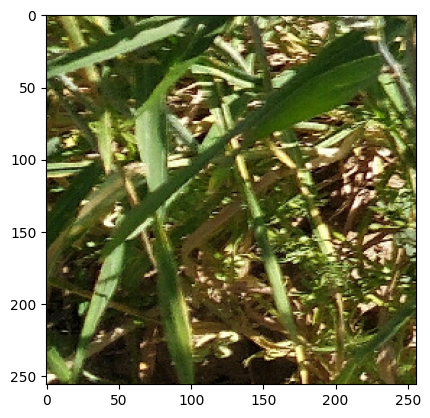

In [ ]:

for images_batch,label_batch in test_ds.take(4):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=label_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual_label:",class_names[first_label])

    predict_label=model.predict(images_batch)# it return values and which value is greater its index is class name of given image
    print("Prediction lable:",class_names[np.argmax(predict_label[0])])#argmax function is used to find the greater value index and then we give this index to class_names function to find class name


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


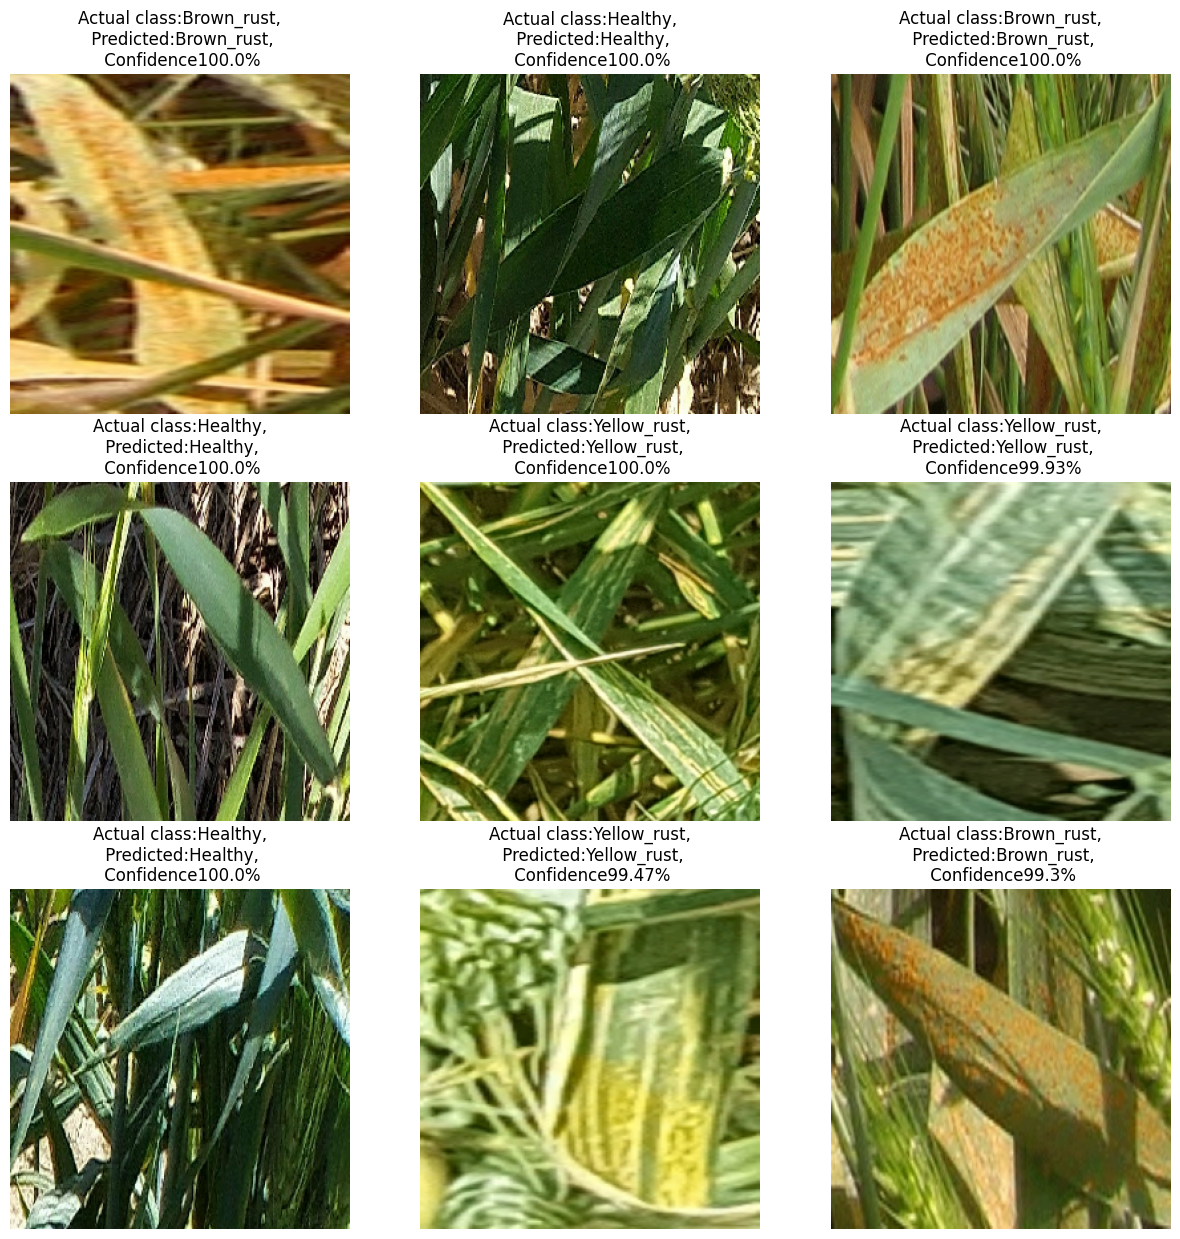

In [ ]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual class:{actual_class},\n Predicted:{predicted_class},\n Confidence{confidence}%")
        plt.axis("off")

model.save("/content/drive/MyDrive/WheatDataSet/wheat.h5")


In [ ]:
model.save('model',save_format='tf')
